In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import random
import sklearn as sk
import sklearn.model_selection as skm

random.seed(786)
np.random.seed(786)


gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)


from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Sun Feb 26 21:06:54 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    25W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Colab Notebooks/

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [ ]:
def generate_to_sequence(nfts, seq_type):
  
  if seq_type == 'train':
    df = pd.read_csv('train.csv')

  if seq_type == 'test':
    df = pd.read_csv('test.csv')

  df = df.sort_values(['Time', 'Ticker'])
  df.reset_index()
  
  if nfts != 123:
    varimp =  pd.read_csv('varimp_36.csv')
    features = nfts+3
    df = df[df.columns.intersection(varimp.iloc[0:features,0])] 

  trainX = []
  trainY = []

  n_future = 254 
  n_past = 254  


  df_for_training = df.astype(float)
  df_for_training = pd.DataFrame.to_numpy(df_for_training)

      
  for i in range(n_future, len(df_for_training) - n_past +1):
      trainY.append(df_for_training[i:i+n_past, 0:1])
          

  #scaler code
  scaler = StandardScaler()
  scaler = scaler.fit(df_for_training)
  df_for_training = scaler.transform(df_for_training)

  for i in range(n_past, len(df_for_training) - n_future +1):
      trainX.append(df_for_training[i - n_past:i, 3:df_for_training.shape[1]])

  trainX = np.array(trainX)
  trainY = np.array(trainY)
  trainY = to_categorical(trainY) 
  trainY = trainY[:,:,1:]

  print('trainX shape == {}.'.format(trainX.shape))
  print('trainY shape == {}.'.format(trainY.shape))
  return(trainX, trainY)

In [ ]:
def LSTM1(nodes,nodes2, dropout,optimizer,batchsize,epochs):
    model = Sequential()
    model.add(LSTM(nodes, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    model.add(LSTM(nodes2, return_sequences=True))
    model.add(Dropout(dropout))
    model.add(Dense(4, activation= 'softmax'))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics='categorical_accuracy')
    #model.summary()

    # fit model
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batchsize, validation_split=0.2, verbose=1)
    max_train_pct = round((np.amax(history.history['categorical_accuracy'])*100),2)
    max_test_pct = round((np.amax(history.history['val_categorical_accuracy'])*100),2)
    
    results = [nodes,nodes2,dropout,optimizer,batchsize,epochs,max_train_pct, max_test_pct]
    
    return(results)


def LSTM2(nodes,nodes2, nodes3, dropout,optimizer,batchsize,epochs):
    model = Sequential()
    model.add(LSTM(nodes, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    model.add(LSTM(nodes2, return_sequences=True))
    model.add(LSTM(nodes3, return_sequences=True))
    model.add(Dropout(dropout))
    model.add(Dense(4, activation= 'softmax'))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics='categorical_accuracy')
    #model.summary()

    # fit model
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batchsize, validation_split=0.2, verbose=1)
    max_train_pct = round((np.amax(history.history['categorical_accuracy'])*100),2)
    max_test_pct = round((np.amax(history.history['val_categorical_accuracy'])*100),2)
    
    results = [nodes,nodes2,nodes3,dropout,optimizer,batchsize,epochs,max_train_pct, max_test_pct]
    
    return(results)

def LSTM3(nodes,nodes2, nodes3,nodes4, dropout,optimizer,batchsize,epochs):
    model = Sequential()
    model.add(LSTM(nodes, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    model.add(LSTM(nodes2, return_sequences=True))
    model.add(LSTM(nodes3, return_sequences=True))
    model.add(LSTM(nodes4, return_sequences=True))
    model.add(Dropout(dropout))
    model.add(Dense(4, activation= 'softmax'))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics='categorical_accuracy')
    #model.summary()

    # fit model
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batchsize, validation_split=0.2, verbose=1)
    max_train_pct = round((np.amax(history.history['categorical_accuracy'])*100),2)
    max_test_pct = round((np.amax(history.history['val_categorical_accuracy'])*100),2)
    
    results = [nodes,nodes2,nodes3,nodes4,dropout,optimizer,batchsize,epochs,max_train_pct, max_test_pct]
    
    return(results)

def LSTM1D1(nodes,nodes2, nodes3, activation, dropout,optimizer,batchsize,epochs):
    model = Sequential()
    model.add(LSTM(nodes, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    model.add(LSTM(nodes2, return_sequences=True))
    model.add(Dense(nodes3, activation= activation))
    model.add(Dropout(dropout))
    model.add(Dense(4, activation= 'softmax'))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics='categorical_accuracy')
    #model.summary()

    # fit model
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batchsize, validation_split=0.2, verbose=1)
    max_train_pct = round((np.amax(history.history['categorical_accuracy'])*100),2)
    max_test_pct = round((np.amax(history.history['val_categorical_accuracy'])*100),2)
    
    results = [nodes,nodes2,nodes3,activation, dropout,optimizer,batchsize,epochs,max_train_pct, max_test_pct]
    
    return(results)

def LSTM1D2(nodes,nodes2, nodes3,nodes4,activation, dropout,optimizer,batchsize,epochs):
    model = Sequential()
    model.add(LSTM(nodes, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    model.add(LSTM(nodes2, return_sequences=True))
    model.add(Dense(nodes3, activation= activation))
    model.add(Dense(nodes4, activation= activation))
    model.add(Dropout(dropout))
    model.add(Dense(4, activation= 'softmax'))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics='categorical_accuracy')
    #model.summary()

    # fit model
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batchsize, validation_split=0.2, verbose=1)
    max_train_pct = round((np.amax(history.history['categorical_accuracy'])*100),2)
    max_test_pct = round((np.amax(history.history['val_categorical_accuracy'])*100),2)
    
    results = [nodes,nodes2,nodes3,nodes4,activation,dropout,optimizer,batchsize,epochs,max_train_pct, max_test_pct]
    
    return(results)


In [ ]:
def run_all_models_TO(epochs, nfts):
    nqts = 2

    feature_nodes = nfts + 1

    # LSTM1 ------------------------------------------------------------------------------------------------------------------
    columns = [
        "nodes",
        "nodes2",
        "dropout",
        "optimizer",
        "batchsize",
        "epochs",
        "max_train",
        "test_pct",
    ]

    grid1 = skm.ParameterGrid(param_grid_lstm1)
    results_df = pd.DataFrame(columns=columns)
    run_no = 1
    # run model and tune
    for params in grid1:
        run = LSTM1(
            nodes=feature_nodes,
            nodes2=params["nodes2"],
            dropout=params["dropout"],
            optimizer=params["optimizer"],
            batchsize=params["batchsize"],
            epochs=epochs,
        )

        run_s = pd.Series(run, index=columns)

        results_df = results_df.append(run_s, ignore_index=True)
        run_no += 1
        print(run_no, "of LSTM1")
    results_df.to_csv("LSTM1_TO_{q}_{f}.csv".format(q=nqts, f=nfts))

    # LSTM2 ------------------------------------------------------------------------------------------------------------------
    columns = [
        "nodes",
        "nodes2",
        "nodes3",
        "dropout",
        "optimizer",
        "batchsize",
        "epochs",
        "max_train",
        "test_pct",
    ]
    results_df = pd.DataFrame(columns=columns)
    run_no = 1

    grid2 = skm.ParameterGrid(param_grid_lstm2)

    # run model and tune
    for params in grid2:
        run = LSTM2(
            nodes=feature_nodes,
            nodes2=params["nodes2"],
            nodes3=params["nodes3"],
            dropout=params["dropout"],
            optimizer=params["optimizer"],
            batchsize=params["batchsize"],
            epochs=epochs,
        )

        run_s = pd.Series(run, index=columns)

        results_df = results_df.append(run_s, ignore_index=True)
        run_no += 1
        print(run_no, "of LSTM2")
    results_df.to_csv("LSTM2_TO_{q}_{f}.csv".format(q=nqts, f=nfts))

    # LSTM3 ------------------------------------------------------------------------------------------------------------------

    # initialize the empty results dataframe
    columns = [
        "nodes",
        "nodes2",
        "nodes3",
        "nodes4",
        "dropout",
        "optimizer",
        "batchsize",
        "epochs",
        "max_train",
        "test_pct",
    ]
    results_df = pd.DataFrame(columns=columns)
    run_no = 1

    grid3 = skm.ParameterGrid(param_grid_lstm3)
    # run model and tune
    for params in grid3:
        run = LSTM3(
            nodes=feature_nodes,
            nodes2=params["nodes2"],
            nodes3=params["nodes3"],
            nodes4=params["nodes4"],
            dropout=params["dropout"],
            optimizer=params["optimizer"],
            batchsize=params["batchsize"],
            epochs=epochs,
        )

        run_s = pd.Series(run, index=columns)

        results_df = results_df.append(run_s, ignore_index=True)
        run_no += 1
        print(run_no, "of LSTM3")
    results_df.to_csv("LSTM3_TO_{q}_{f}.csv".format(q=nqts, f=nfts))

    # LSTM1D1 ------------------------------------------------------------------------------------------------------------------
    columns = [
        "nodes",
        "nodes2",
        "nodes3",
        "activation",
        "dropout",
        "optimizer",
        "batchsize",
        "epochs",
        "max_train",
        "test_pct",
    ]
    results_df = pd.DataFrame(columns=columns)
    # initialize loading variables batch size of 64
    run_no = 1
    grid4 = skm.ParameterGrid(param_grid_lstm1d1)
    # run model and tune
    for params in grid4:
        run = LSTM1D1(
            nodes=feature_nodes,
            nodes2=params["nodes2"],
            nodes3=params["nodes3"],
            activation=params["activation"],
            dropout=params["dropout"],
            optimizer=params["optimizer"],
            batchsize=params["batchsize"],
            epochs=epochs,
        )

        run_s = pd.Series(run, index=columns)

        results_df = results_df.append(run_s, ignore_index=True)
        run_no += 1
        print(run_no, "of LSTM1D1")
    results_df.to_csv("LSTM1D1_TO_{q}_{f}.csv".format(q=nqts, f=nfts))

    # LSTM1D2 ------------------------------------------------------------------------------------------------------------------
    columns = [
        "nodes",
        "nodes2",
        "nodes3",
        "nodes4",
        "activation",
        "dropout",
        "optimizer",
        "batchsize",
        "epochs",
        "max_train",
        "test_pct",
    ]
    results_df = pd.DataFrame(columns=columns)
    grid5 = skm.ParameterGrid(param_grid_lstm1d2)
    # initialize loading variables
    run_no = 1
    # run model and tune
    for params in grid5:
        run = LSTM1D2(
            nodes=feature_nodes,
            nodes2=params["nodes2"],
            nodes3=params["nodes3"],
            nodes4=params["nodes4"],
            activation=params["activation"],
            dropout=params["dropout"],
            optimizer=params["optimizer"],
            batchsize=params["batchsize"],
            epochs=epochs,
        )

        run_s = pd.Series(run, index=columns)

        results_df = results_df.append(run_s, ignore_index=True)

        run_no += 1
        print(run_no, "of LSTM1D2")
    results_df.to_csv("LSTM1D2_TO_{q}_{f}.csv".format(q=nqts, f=nfts))


In [ ]:
param_grid_lstm1 = {
    "nodes2": [20, 50],
    "dropout": [0.4, 0.6],
    "optimizer": ["Adam"],
    "batchsize": [16],
}

param_grid_lstm2 = {
    "nodes2": [50, 100],
    "nodes3": [50, 75, 100],
    "dropout": [0.4, 0.6],
    "optimizer": ["Adam"],
    "batchsize": [16],
}

param_grid_lstm3 = {
    "nodes2": [75, 100],
    "nodes3": [50, 75],
    "nodes4": [20, 50, 75, 100],
    "dropout": [0.4, 0.6],
    "optimizer": ["Adam"],
    "batchsize": [16],
}

param_grid_lstm1d1 = {
    "nodes2": [20, 50, 75, 100],
    "nodes3": [10, 50, 75, 100],
    "activation": ["tanh", "relu"],
    "dropout": [0.4, 0.6],
    "optimizer": ["Adam"],
    "batchsize": [16],
}

param_grid_lstm1d2 = {
    "nodes2": [50, 75, 100],
    "nodes3": [20, 50, 75],
    "nodes4": [20, 50, 75],
    "activation": ["relu"],
    "dropout": [0.2, 0.6],
    "optimizer": ["Adam"],
    "batchsize": [16],
}


In [ ]:
features_list = [10, 25]

for features in features_list:
    trainX, trainY = generate_to_sequence(features, 'train')
    run_all_models_TO(10, features)


In [ ]:
def LSTM1D1(nodes,nodes2, nodes3, activation, dropout,optimizer,batchsize,epochs):
    model = Sequential()
    model.add(LSTM(nodes, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    model.add(LSTM(nodes2, return_sequences=True))
    model.add(Dense(nodes3, activation= activation))
    model.add(Dropout(dropout))
    model.add(Dense(4, activation= 'softmax'))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics='categorical_accuracy')
    #model.summary()

    # fit model
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batchsize, validation_split=0.2, verbose=1)
    max_train_pct = round((np.amax(history.history['categorical_accuracy'])*100),2)
    max_test_pct = round((np.amax(history.history['val_categorical_accuracy'])*100),2)
    
    results = [nodes,nodes2,nodes3,activation, dropout,optimizer,batchsize,epochs,max_train_pct, max_test_pct]
    
    return(model,results)

def LSTM1D2(nodes,nodes2, nodes3,nodes4,activation, dropout,optimizer,batchsize,epochs):
    model = Sequential()
    model.add(LSTM(nodes, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    model.add(LSTM(nodes2, return_sequences=True))
    model.add(Dense(nodes3, activation= activation))
    model.add(Dense(nodes4, activation= activation))
    model.add(Dropout(dropout))
    model.add(Dense(4, activation= 'softmax'))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics='categorical_accuracy')
    #model.summary()

    # fit model
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batchsize, validation_split=0.2, verbose=1)
    max_train_pct = round((np.amax(history.history['categorical_accuracy'])*100),2)
    max_test_pct = round((np.amax(history.history['val_categorical_accuracy'])*100),2)
    
    results = [nodes,nodes2,nodes3,nodes4,activation,dropout,optimizer,batchsize,epochs,max_train_pct, max_test_pct]
    
    return(model,results)


In [ ]:
def train_models(nqts,nfts,nodes2,nodes3,nodes4,activation ,dropout,optimizer,batchsize,epochs, arch):

  nqts = nqts

  feature_nodes = nfts+1 

  #LSTM1 ------------------------------------------------------------------------------------------------------------------
  #run model and tune
  if arch == 'LLO':
      run = LSTM1(nodes=feature_nodes,\
                        nodes2 = nodes2,\
                        dropout=dropout,\
                        optimizer =optimizer,\
                        batchsize=batchsize, \
                        epochs= epochs)
      

  #LSTM2 ------------------------------------------------------------------------------------------------------------------
  #run model and tune
  if arch == 'LLLO':
      run = LSTM2(nodes=feature_nodes,\
                        nodes2 = nodes2,\
                        nodes3 = nodes3,\
                        dropout=dropout,\
                        optimizer =optimizer,\
                        batchsize=batchsize, \
                        epochs= epochs)

  #LSTM3 ------------------------------------------------------------------------------------------------------------------
  #run model and tune
  if arch == 'LLLLO':
      run = LSTM3(nodes=feature_nodes,\
                        nodes2 = nodes2,\
                        nodes3 = nodes3,\
                        nodes4 = nodes4,\
                        dropout= dropout,\
                        optimizer = optimizer,\
                        batchsize= batchsize, \
                        epochs= epochs)


  #LSTM1D1 ------------------------------------------------------------------------------------------------------------------
  #run model and tune
  if arch == 'LLDO':
      run = LSTM1D1(nodes=feature_nodes,\
                        nodes2 = nodes2,\
                        nodes3 = nodes3,\
                        activation = activation,\
                        dropout=dropout,\
                        optimizer =optimizer,\
                        batchsize=batchsize, \
                        epochs= epochs)
      

  #LSTM1D2 ------------------------------------------------------------------------------------------------------------------
  #run model and tune
  if arch == 'LLDDO':
      run = LSTM1D2(nodes=feature_nodes,\
                        nodes2 = nodes2,\
                        nodes3 = nodes3,\
                        nodes4 = nodes4,\
                        activation = activation,\
                        dropout=dropout,\
                        optimizer =optimizer,\
                        batchsize=batchsize, \
                        epochs= epochs)
      

  return run

from matplotlib import pyplot as plt
import tensorflow as tf

from sklearn.metrics import confusion_matrix
from sklearn import metrics


def predict_sequences(model, nqts,nfts, filename):
  testX, testY = generate_to_sequence(nfts, "test")
  y_pred = (model.predict(testX))
  print(y_pred.shape)
  y_pred = (y_pred.argmax(axis=2)).reshape(nqts*127)

  y_actu = (testY.argmax(axis=2)).reshape(nqts*127)
  print(confusion_matrix(y_actu,y_pred))
  pd.crosstab(y_actu, y_pred).to_csv("{}.csv".format(filename))
  print(metrics.accuracy_score(y_pred,y_actu))



In [ ]:
trainX, trainY = generate_to_sequence(25, 'train')

model_1 = train_models(2,25,75,50,'NA',"relu",0.4,"Adam",16,10,"LLDO")
predict_sequences(model_1[0],2, 25, "model_1_TO")

model_2 = train_models(2,25,100,75,20,"relu",0.6,"Adam",16,10,"LLDDO")
predict_sequences(model_2[0],2, 25, "model_2_TO")

model_3 = train_models(2,25,100,75,50,"relu",0.6,"Adam",16,10,"LLDDO")
predict_sequences(model_3[0],2, 25, "model_3_TO")

trainX shape == (4065, 254, 25).
trainY shape == (4065, 254, 4).
Epoch 1/10
204/204 [==============================] - 8s 21ms/step - loss: 0.6815 - categorical_accuracy: 0.7151 - val_loss: 0.6932 - val_categorical_accuracy: 0.8310
Epoch 2/10
204/204 [==============================] - 3s 17ms/step - loss: 0.0762 - categorical_accuracy: 0.9769 - val_loss: 0.7553 - val_categorical_accuracy: 0.8587
Epoch 3/10
204/204 [==============================] - 3s 17ms/step - loss: 0.0281 - categorical_accuracy: 0.9915 - val_loss: 0.8245 - val_categorical_accuracy: 0.8622
Epoch 4/10
204/204 [==============================] - 3s 16ms/step - loss: 0.0180 - categorical_accuracy: 0.9943 - val_loss: 0.9077 - val_categorical_accuracy: 0.8596
Epoch 5/10
204/204 [==============================] - 3s 17ms/step - loss: 0.0140 - categorical_accuracy: 0.9953 - val_loss: 0.9058 - val_categorical_accuracy: 0.8684
Epoch 6/10
204/204 [==============================] - 4s 17ms/step - loss: 0.0116 - categorical_accu

trainX shape == (4065, 254, 25).
trainY shape == (4065, 254, 4).
Epoch 1/50
204/204 [==============================] - 8s 23ms/step - loss: 0.6115 - categorical_accuracy: 0.7416 - val_loss: 0.6208 - val_categorical_accuracy: 0.8290
Epoch 2/50
204/204 [==============================] - 4s 18ms/step - loss: 0.0684 - categorical_accuracy: 0.9785 - val_loss: 0.8147 - val_categorical_accuracy: 0.8359
Epoch 3/50
204/204 [==============================] - 4s 18ms/step - loss: 0.0367 - categorical_accuracy: 0.9885 - val_loss: 0.8947 - val_categorical_accuracy: 0.8565
Epoch 4/50
204/204 [==============================] - 4s 18ms/step - loss: 0.0254 - categorical_accuracy: 0.9919 - val_loss: 0.9418 - val_categorical_accuracy: 0.8673
Epoch 5/50
204/204 [==============================] - 4s 18ms/step - loss: 0.0191 - categorical_accuracy: 0.9938 - val_loss: 1.0797 - val_categorical_accuracy: 0.8702
Epoch 6/50
204/204 [==============================] - 4s 18ms/step - loss: 0.0182 - categorical_accu

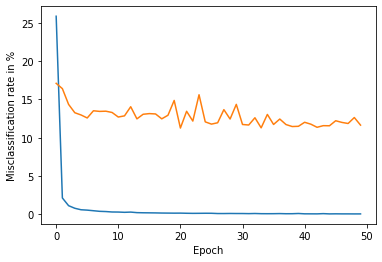

In [ ]:
def plot_learning_curves(run):
  history = run[0].history
  plt.plot([(1-z)*100 for z in history.history['categorical_accuracy']])
  plt.plot([(1-z)*100 for z in history.history['val_categorical_accuracy']])
  #plt.title('model 1 train and validation accuracy')
  plt.ylabel('Misclassification rate in %')
  plt.xlabel('Epoch')
  #plt.legend(['Training', 'Validation'], loc='upper left')
  #plt.legend('')
  plt.show()


trainX, trainY = generate_to_sequence(25, 'train')
model_3 = train_models(2,25,100,75,50,"relu",0.6,"Adam",16,50,"LLDDO")
plot_learning_curves(model_3)
